In [1]:
import sys 
sys.path.append("../models/")
from functions import plot_style
from import_functions import get_averted_deaths
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
colors = plot_style("../fonts/Encode_Sans_Condensed/")

countries = np.array(['Indonesia', 'Bolivia', 'Morocco', 'Bangladesh', 'Sri-Lanka', 'Kenya', 'Mozambique',
                      "Afghanistan", "Cote-dIvoire", "Pakistan", "El-Salvador", "Kyrgyzstan",
                      "Philippines", "Uganda", "Egypt", "Rwanda", "Zambia", "Angola", "Ghana", "Honduras"])

In [2]:
def import_projections(country, scenario, IQR, baseline='data-driven', path="./projections_october/"):

    # get averted deaths in perc
    avertedDeaths_perc = get_averted_deaths(country, scenario, scaled=False, baseline=baseline, perc=True, path=path)
    avertedDeaths_perc_med = np.median(avertedDeaths_perc)
    if IQR:
        avertedDeaths_perc_q1 = np.quantile(avertedDeaths_perc, q=0.25)
        avertedDeaths_perc_q2 = np.quantile(avertedDeaths_perc, q=0.75)
    else:
        avertedDeaths_perc_q1 = np.quantile(avertedDeaths_perc, q=0.05)
        avertedDeaths_perc_q2 = np.quantile(avertedDeaths_perc, q=0.95)

    # get averted deaths raw (without underreporting multiplier)
    avertedDeaths = get_averted_deaths(country, scenario, scaled=False, baseline=baseline, perc=False, path=path)
    avertedDeaths_med = np.median(avertedDeaths)

    # get averted deaths raw (with underreporting multiplier)
    avertedDeaths_scaled = get_averted_deaths(country, scenario, scaled=True, baseline=baseline, perc=False, path=path)
    avertedDeaths_scaled_med = np.median(avertedDeaths_scaled)

    return avertedDeaths_perc_med, avertedDeaths_perc_q1, avertedDeaths_perc_q2, avertedDeaths_med, avertedDeaths_scaled_med
    

def plot_bar(ax, pos, med, q1, q2, color, marker, s):
    p1 = ax.scatter([pos], [med], color=color, s=s, edgecolor='white', linewidth=0.7, zorder=1, marker=marker)
    p2, = ax.plot([pos, pos], [q1, q2], color=color, solid_capstyle='round', linewidth=8, alpha=0.5, zorder=-1)
    return p1, p2


def barplot(ax, marker, scenario, IQR, country_title, baseline='data-driven', color=colors[0], path="./projections_october/", s=100):
    # get projections
    avertedDeaths_perc_med, avertedDeaths_perc_q1, avertedDeaths_perc_q2 = np.zeros(len(countries)), np.zeros(len(countries)), np.zeros(len(countries))
    avertedDeaths_med, avertedDeaths_scaled_med = np.zeros(len(countries)), np.zeros(len(countries)) 

    for i in range(len(countries)):
        country = countries[i]
        perc_med, perc_q1, perc_q2, med, scaled_med = import_projections(country, scenario, IQR, baseline=baseline, path=path)
        avertedDeaths_perc_med[i] = perc_med
        avertedDeaths_perc_q1[i] = perc_q1
        avertedDeaths_perc_q2[i] = perc_q2
        avertedDeaths_med[i] = med
        avertedDeaths_scaled_med[i] = scaled_med

    # plot  
    idx = np.argsort(avertedDeaths_perc_med)#[::-1]

    for i in range(len(idx)):
        p1, p2 = plot_bar(ax, i, avertedDeaths_perc_med[idx[i]], avertedDeaths_perc_q1[idx[i]], avertedDeaths_perc_q2[idx[i]], color, marker, s)

    ax.set_xticks(range(len(idx)))
    ax.set_xticklabels(countries[idx], rotation=90, size=8)
    ax.set_ylabel("Averted Deaths (%)",  fontsize=8)
    if "rescale" in scenario:
        ax.set_title("Averted deaths by {0} vaccination rates".format(country_title), weight="bold")
    elif "start" in scenario:
        ax.set_title("Averted deaths starting vaccinations as {0}".format(country_title), weight="bold")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.grid(True, color='grey', linewidth=0.1, zorder=-1, linestyle="--")
    ax.set_axisbelow(True)
    ax.tick_params(axis="y", labelsize=8)

    return p1, p2

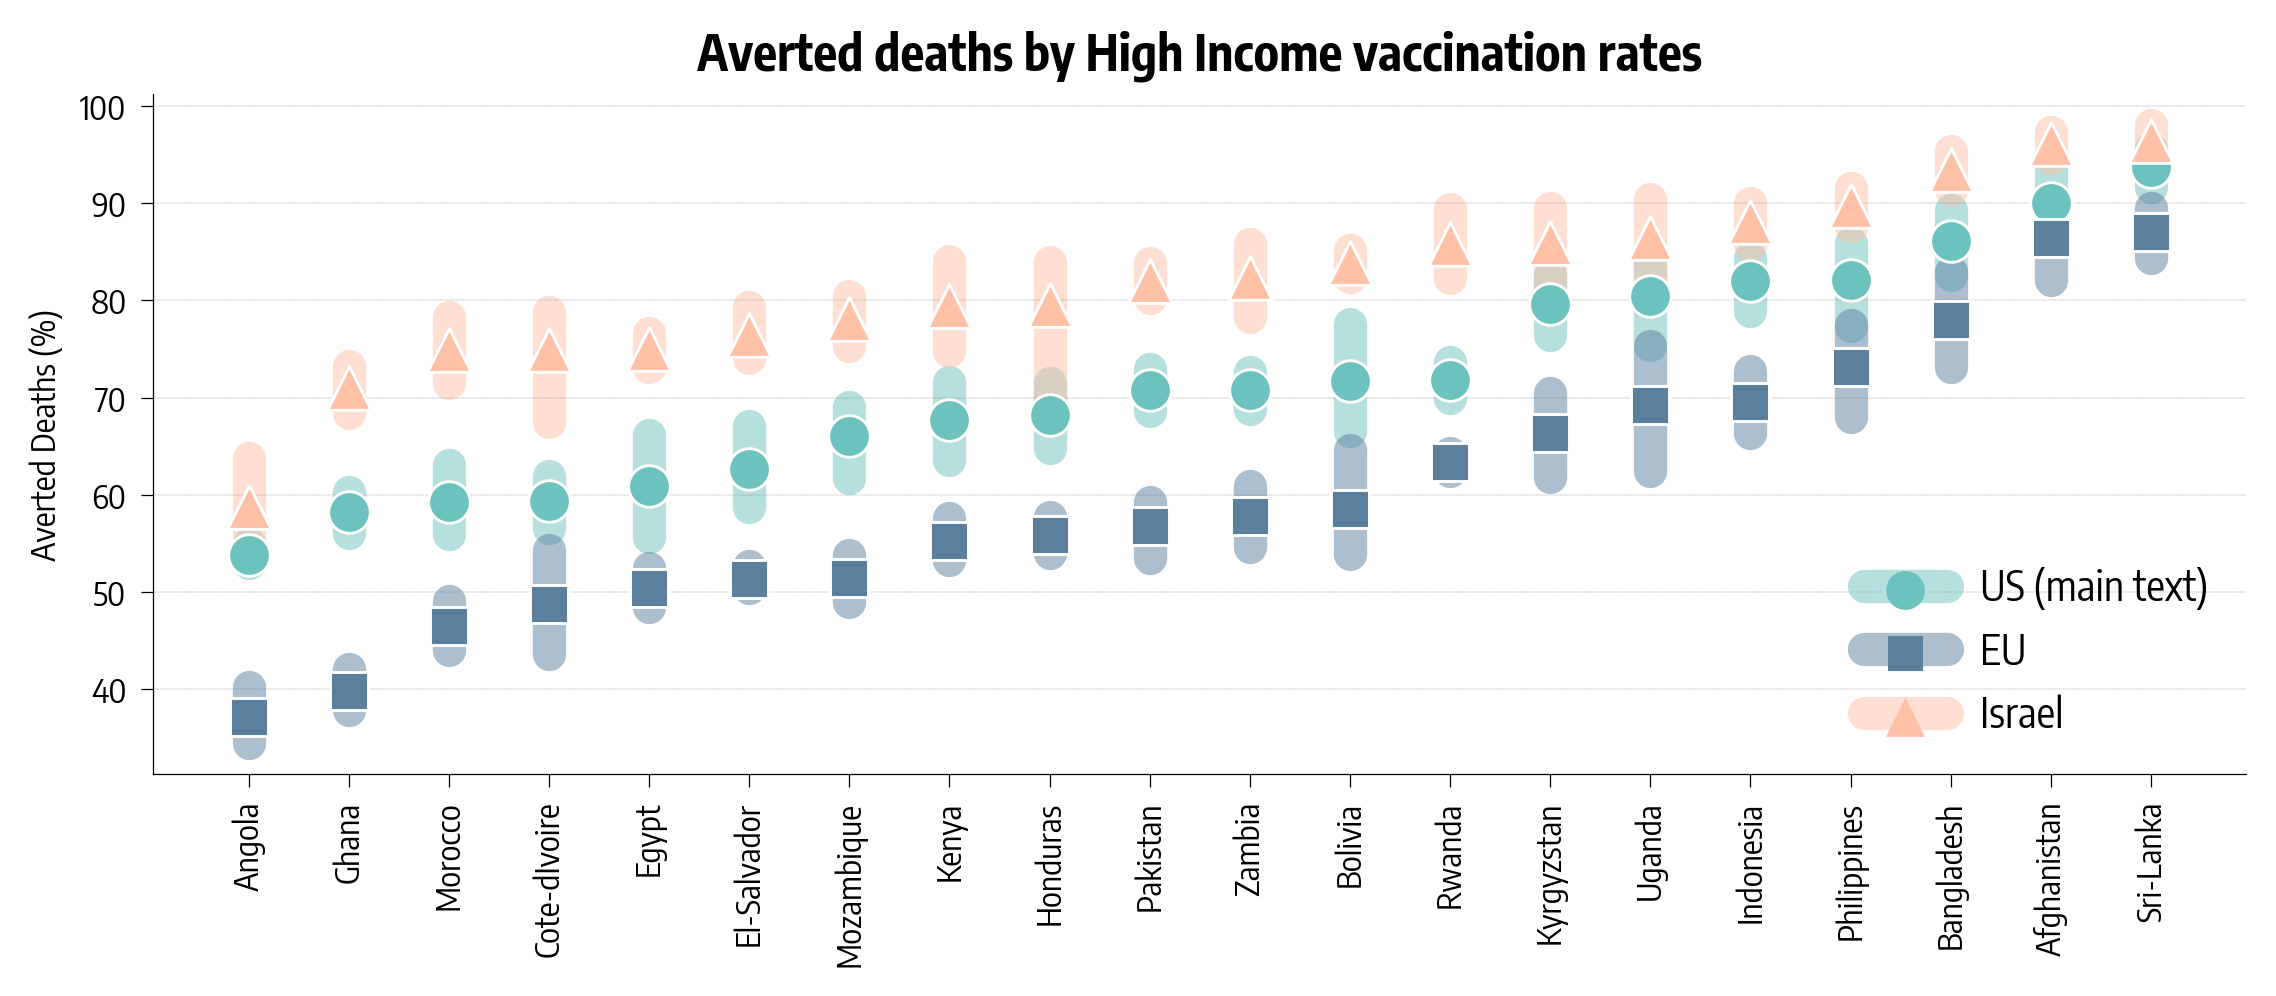

In [3]:
countries = np.array(['Indonesia', 'Bolivia', 'Morocco', 'Bangladesh', 'Sri-Lanka', 'Kenya', 'Mozambique',
                      "Afghanistan", "Cote-dIvoire", "Pakistan", "El-Salvador", "Kyrgyzstan",
                      "Philippines", "Uganda", "Egypt", "Rwanda", "Zambia", "Angola", "Ghana", "Honduras"])

fig, axes = plt.subplot_mosaic([["A", "A"], ["A", "A"]], dpi=300, figsize=(9,3))
p1, p2 = barplot(axes["A"], "o", "us_rescale", IQR=True, baseline='data-driven', color=colors[0], country_title="High Income", path="./projections_october/", s=100)
p3, p4 = barplot(axes["A"], "s", "eu_rescale", IQR=True, baseline='data-driven', color=colors[1], country_title="High Income", path="./projections_october/", s=80)
p5, p6 = barplot(axes["A"], "^", "isrl_rescale", IQR=True, baseline='data-driven', color=colors[2], country_title="High Income", path="./projections_october/", s=110)

axes["A"].legend([(p1, p2), (p3, p4), (p5, p6)], ["US (main text)", "EU", "Israel"], frameon=False, loc="lower right")
plt.savefig("./img/averted_deaths_highincome.pdf", bbox_inches="tight")